# Week 4 Practice

## Comprehensions, revisited

See this for loop that computes the squares of the numbers in the list `x`:

In [1]:
x = [1, 2, 3, 4]

squares = []
for i in x:
    squares.append(i * i)
print(squares)

[1, 4, 9, 16]


Rewrite the for-loop into a list comprehension:

In [2]:
squares = [i * i for i in x]
print(squares)

[1, 4, 9, 16]


Now do it again, but with a condition. For instance, only numbers greater than 1:

In [3]:
squares = [i * i for i in x if i > 1]
print(squares)

[4, 9, 16]


When iterating over strings, each element of the string is a character, not a word:

In [4]:
[c.upper() for c in 'cats and dogs']

['C', 'A', 'T', 'S', ' ', 'A', 'N', 'D', ' ', 'D', 'O', 'G', 'S']

We can make more complicated comprehensions with multiple loops, multiple conditions, etc.:

In [5]:
words = 'cats and dogs'.split()
print([c.upper() for word in words for c in word])

['C', 'A', 'T', 'S', 'A', 'N', 'D', 'D', 'O', 'G', 'S']


But generally this is a bad idea. Large comprehensions get confusing.

## Dictionaries

Python's dictionaries (`dict` objects) can be created in many ways:

In [6]:
{'a': 1, 'b': 2}  # dictionary literal

{'a': 1, 'b': 2}

In [7]:
dict([('a', 1), ('b', 2)])  # dict() call with list of pairs

{'a': 1, 'b': 2}

In [8]:
dict(a=1, b=2)  # dict() call with keyword keys (only for simple keys)

{'a': 1, 'b': 2}

In [9]:
{c: i for i, c in enumerate('ab', 1)}  # in a dict comprehension

{'a': 1, 'b': 2}

#### Challenge

Create a function that takes a string and maps the downcased first letter of each word to the list of words starting with that letter (upper or lowercase).

If I don't have a good idea where to begin, I'd first start out writing what I do know. I want a function that takes a string and returns a dictionary:

In [10]:
def lettermap(string):
    d = {}
    return d

Now I'd start filling in the details. I know I need to go over each word, get the first character of each word, and map it to a list of words, so maybe:

In [11]:
def lettermap(string):
    d = {}
    for word in string.split():
        c = word[0]
        d[c] = [word]
    return d

print(lettermap('dogs CHASE cats'))

{'d': ['dogs'], 'C': ['CHASE'], 'c': ['cats']}


That looks better, but we haven't case-normalized the first letters.

In [12]:
def lettermap(string):
    d = {}
    for word in string.split():
        c = word[0].lower()
        d[c] = [word]
    return d

print(lettermap('dogs CHASE cats'))

{'d': ['dogs'], 'c': ['cats']}


Ok, now we've lost 'CHASE'. We need to create one list and append to it, rather than creating a new list for each word.

In [13]:

def lettermap(string):
    d = {}
    for word in string.split():
        c = word[0].lower()
        if c not in d:
            d[c] = []
        # at this point we know that d[c] has a list, so append to it
        d[c].append(word)
    return d

print(lettermap('dogs CHASE cats'))

{'d': ['dogs'], 'c': ['CHASE', 'cats']}


All done!

## Text Corpora

In [14]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
fileids = nltk.corpus.inaugural.fileids()[-5:]
pairs = []
for fileid in fileids:
    name = fileid[5:-4]
    for word in nltk.corpus.inaugural.words(fileid):
        word = word.lower()
        if word not in stopwords:
            pairs.append((name, word))
cfd = nltk.ConditionalFreqDist(pairs)
cfd

<ConditionalFreqDist with 3 conditions>

In [15]:
cfd.conditions()

['Bush', 'Obama', 'Trump']

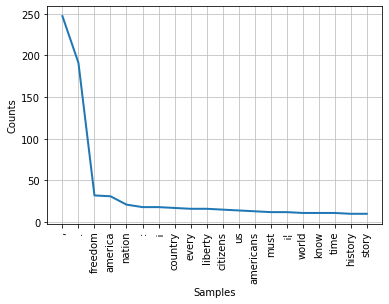

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
cfd['Bush'].plot(20)

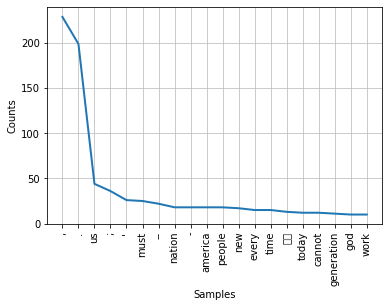

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
cfd['Obama'].plot(20)

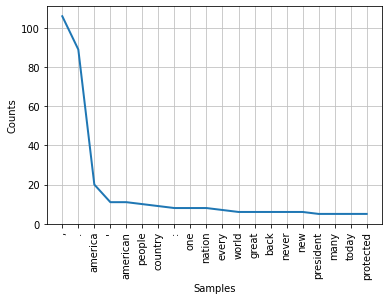

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
cfd['Trump'].plot(20)

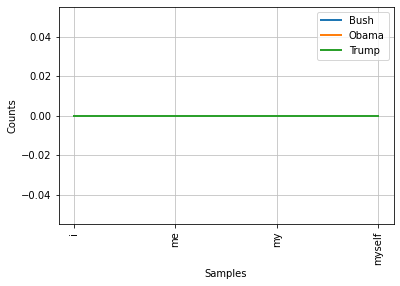

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
cfd.plot(samples=('i', 'me', 'my', 'myself'))

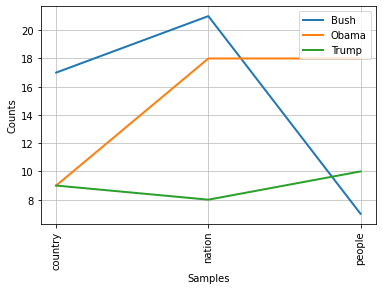

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
cfd.plot(samples=('country', 'nation', 'people'))

In [21]:
for word in ('country', 'nation', 'people'):
    for pres in cfd.conditions():
        print(pres, word, cfd[pres].freq(word))

Bush country 0.007264957264957265
Obama country 0.0032549728752260397
Trump country 0.009584664536741214
Bush nation 0.008974358974358974
Obama nation 0.0065099457504520794
Trump nation 0.008519701810436636
Bush people 0.0029914529914529917
Obama people 0.0065099457504520794
Trump people 0.010649627263045794
